In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
import matplotlib.pyplot as plt

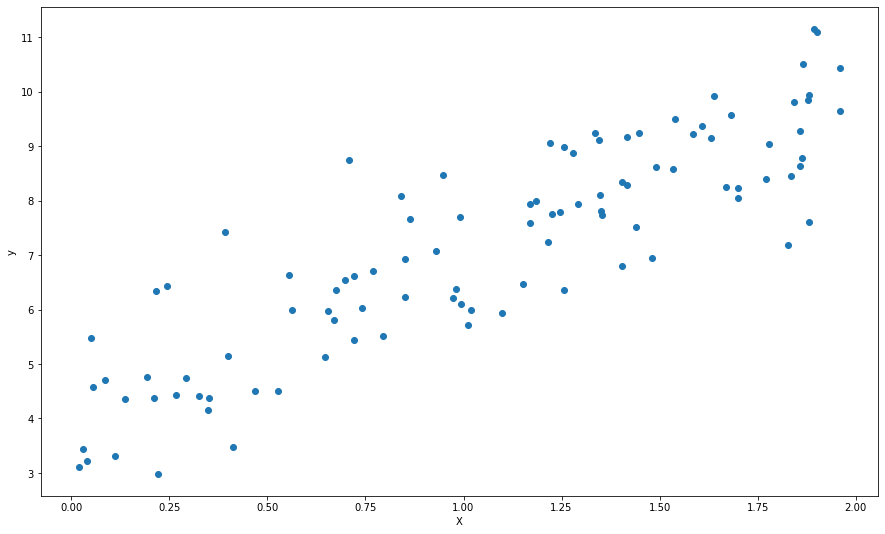

In [5]:
plt.figure(figsize=(15, 9))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [6]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.01345468],
       [2.96593389]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.01345468],
       [9.94532246]])

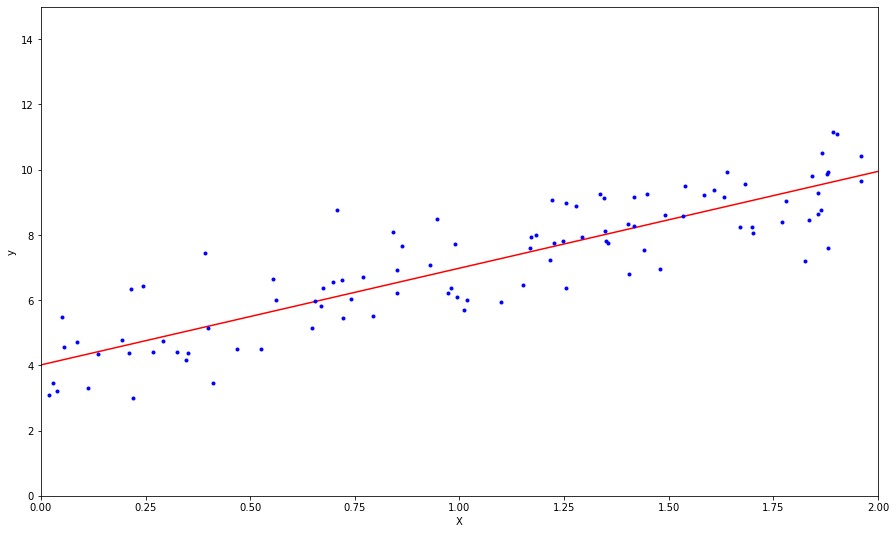

In [9]:
plt.figure(figsize=(15, 9))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [11]:
lin_reg.intercept_

array([4.01345468])

In [12]:
lin_reg.coef_

array([[2.96593389]])

In [14]:
lin_reg.predict(X_new)

array([[4.01345468],
       [9.94532246]])

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.01345468],
       [2.96593389]])

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[4.01345468],
       [2.96593389]])

In [18]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [19]:
theta

array([[4.01345468],
       [2.96593389]])

In [22]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [23]:
theta

array([[4.04877412],
       [2.99025142]])

In [31]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [33]:
sgd_reg.intercept_

array([3.99059107])

In [34]:
sgd_reg.coef_

array([2.9657027])

In [35]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

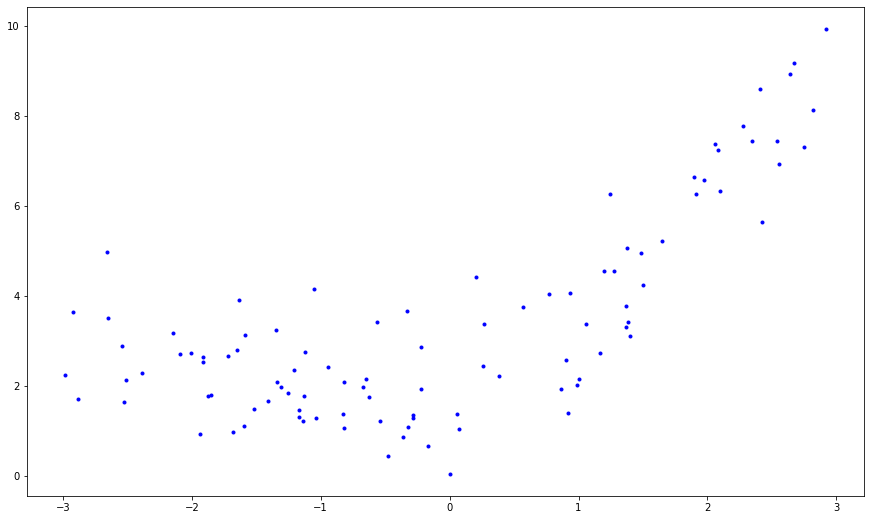

In [37]:
plt.figure(figsize=(15, 9))
plt.plot(X, y, "b.")

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.92041002])

In [39]:
X_poly[0]

array([0.92041002, 0.84715461])

In [40]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [42]:
lin_reg.intercept_, lin_reg.coef_

(array([2.13860959]), array([[0.9494091 , 0.49662139]]))

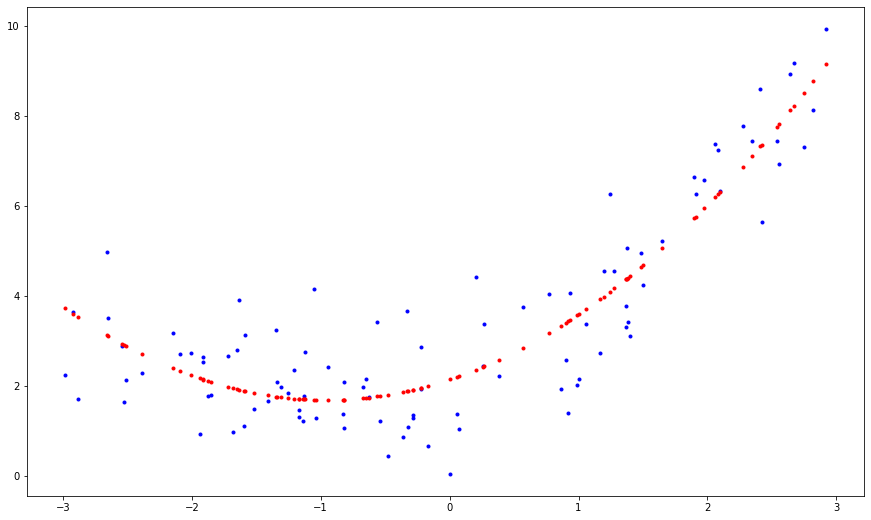

In [51]:
plt.figure(figsize=(15, 9))
plt.plot(X, y, "b.")
plt.plot(X, lin_reg.predict(X_poly), "r.")

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors , val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.figure(figsize=(15, 9))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
#     plt.xlim(0)
#     plt.ylim(0)
    plt.legend()

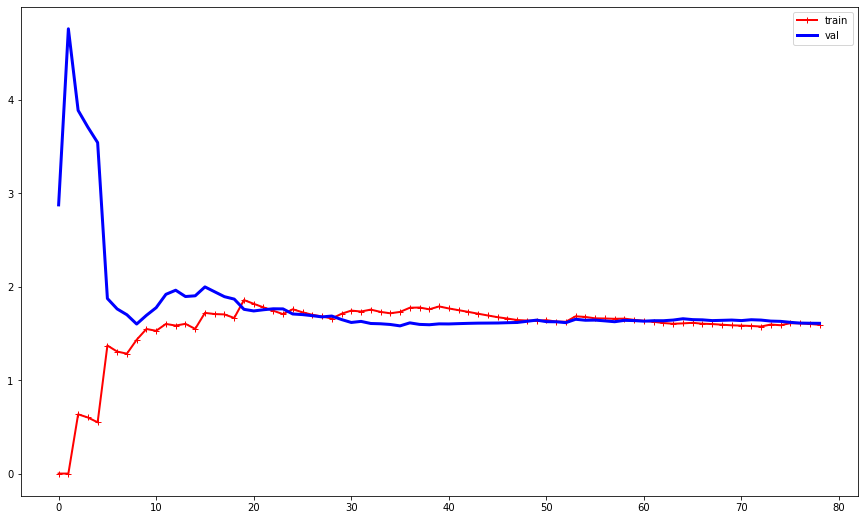

In [75]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

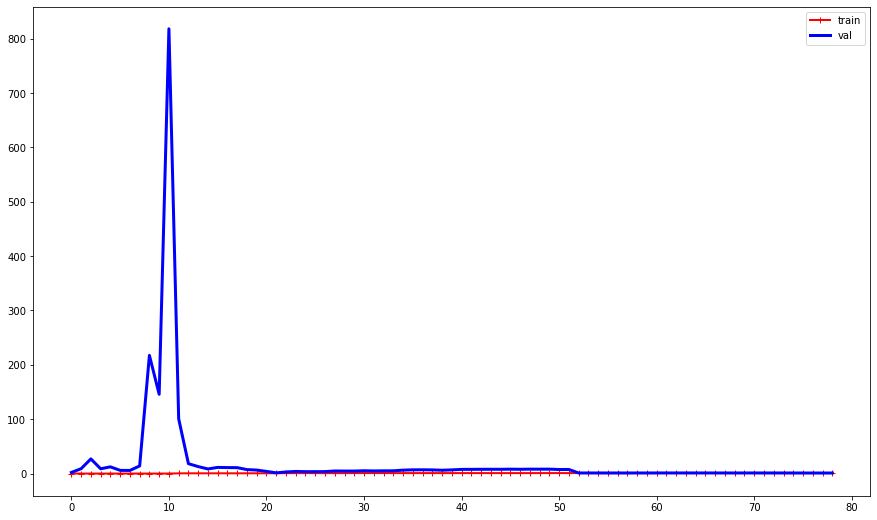

In [76]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

In [77]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.9154857]])

In [78]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.89485385])

In [79]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.86112807])

In [80]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.86311345])

In [81]:
from sklearn.datasets import load_iris

iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [83]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int32)

In [84]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

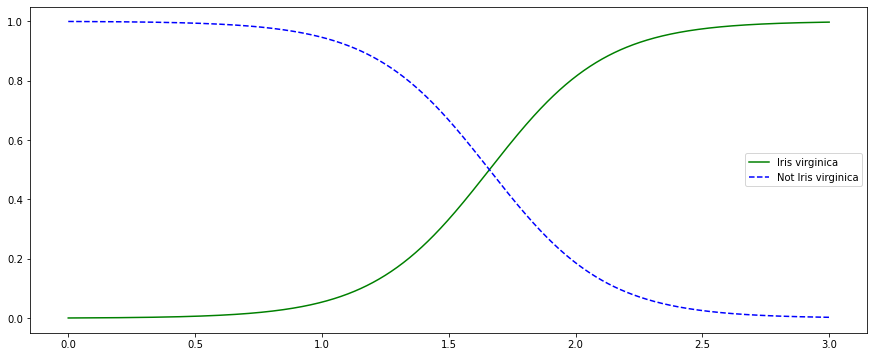

In [88]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(15, 6))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend()

In [91]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [94]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [95]:
softmax_reg.predict([[5, 2]])

array([2])

In [96]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])